In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from rich import print

figsize = (15,15)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# By Jake VanderPlas
# License: BSD-style

import matplotlib.pyplot as plt
import numpy as np


def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


ni_py_spec_30 = discrete_cmap(30, 'nipy_spectral')

/var/folders/dw/sj94s2457kl2gkb829ty4_cc0000gn/T/ipykernel_83043/307176117.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = plt.cm.get_cmap(base_cmap)


In [3]:
from tpvalidator.utilities import temporary_log_level
import tpvalidator.datapool as dp
import logging

pool=None
with temporary_log_level(dp.TriggerPrimitivesWorkspace._log, logging.INFO):
    pool = dp.TriggerPrimitivesWorkspace("../data/vd/bkg/tptree_st_tpg_vd_radiols.root")


<TTree 'ides_tree' (13 branches) at 0x00011ff97b10>


In [6]:
import rich

rich.print(pool.info)

{
    'geo': {'detector': 'dunevd10kt_3view_30deg_v5_refactored_1x8x6ref'},
    'mc_generators': [
        'CavernNGammasAtLAr1x8x6',
        'Rn222ChainBi214GenInLAr',
        'Rn222ChainFromBi214GenInUpperMesh1x8x6',
        'Th232ChainGenInAnode',
        'CavernwallGammasAtLAr1x8x6',
        'Rn222ChainFromPb210GenInUpperMesh1x8x6',
        'Rn222ChainFromPb214GenInUpperMesh1x8x6',
        'Rn222ChainPo218GenInLAr',
        'Rn222ChainPb214GenInLAr',
        'Ar39GenInLAr',
        'Rn222ChainPb210GenInLAr',
        'Rn222ChainFromPo218GenInUpperMesh1x8x6',
        'Rn222ChainFromBi210GenInUpperMesh1x8x6',
        'Ar42GenInLAr',
        'Rn222ChainGenInPDS',
        'K42From42ArGenInLAr',
        'Rn220ChainPb212GenInLAr',
        'CavernwallNeutronsAtLAr1x8x6',
        'K40GenInAnode',
        'U238ChainGenInCathode',
        'Rn222ChainRn222GenInLAr',
        'Th232ChainGenInCathode',
        'K42From42ArGenInUpperMesh1x8x6',
        'foamGammasAtLAr1x8x6',
        'K40GenInCathode',
        'U238ChainGenInAnode',
        'Kr85GenInLAr',
        'CryostatNGammasAtLAr1x8x6',
        'Rn220ChainFromPb212GenInUpperMesh1x8x6'
    ],
    'tpg': {
        'threshold_tpg_plane0': 60,
        'threshold_tpg_plane1': 60,
        'threshold_tpg_plane2': 50,
        'tool': 'TPAlgTPCSimpleThreshold'
    },
    'tptree': {'U_window_offset': 8, 'V_window_offset': 1, 'X_window_offset': -7}
}

In [4]:
pool.tps

event  n_TPs  TP_channel  TP_startT  TP_peakT  TP_peakADC  \
entry subentry                                                              
0     0             1   8173          30       6632      6633          78   
      1             1   8173          47       4466      4467          75   
      2             1   8173          47       8271      8274         119   
      3             1   8173          60       6439      6440          75   
      4             1   8173          61       5096      5097         102   
...               ...    ...         ...        ...       ...         ...   
2     8147          3   8152       41452       7771      7774         208   
      8148          3   8152       41453       1942      1943          61   
      8149          3   8152       41453       3478      3478          51   
      8150          3   8152       41453       5809      5812          73   
      8151          3   8152       41471        480       480          54   

                TP_SADC  TP_TOT  TP_plane  TP_TPC  TP_trueX  TP_trueY  \
entry subentry                                                          
0     0             210       3         0       0        -3      -650   
      1             204       3         0       0       260      -633   
      2             597       6         0       0        -1        -1   
      3             212       3         0       0       161      -622   
      4             369       4         0       0       210      -618   
...                 ...     ...       ...     ...       ...       ...   
2     8147         1169       8         2      47       320       655   
      8148          174       3         2      47       314       612   
      8149           51       1         2      47        -1        -1   
      8150          263       4         2      47       150       656   
      8151           54       1         2      47      -205       671   

                TP_trueZ  TP_signal  TP_mcgen_id  TP_n_mcgen  
entry subentry                                                
0     0               10          1            9           1  
      1                6          1            9           1  
      2               -1          0           -1          -1  
      3                7          1            9           1  
      4                1          1            9           1  
...                  ...        ...          ...         ...  
2     8147           886          1            4           1  
      8148           886          1            9           1  
      8149            -1          0           -1          -1  
      8150           886          1            9           1  
      8151           895          1            9           1  

[24744 rows x 16 columns]

array([[<Axes: title={'center': 'TP_mcgen_id'}>]], dtype=object)

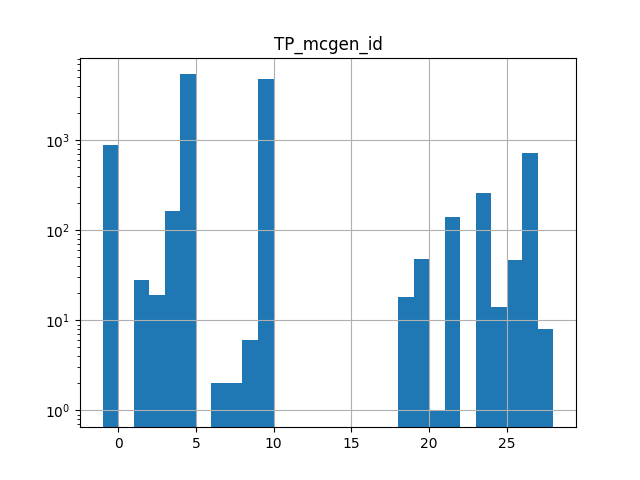

In [7]:
pool.tps[pool.tps.TP_plane == 2][['TP_mcgen_id']].hist(bins=len(pool.info['mc_generators']), log=True)


In [8]:
tps_c  = pool.tps[pool.tps.TP_plane == 2]


<Axes: xlabel='TP_trueY', ylabel='TP_trueX'>

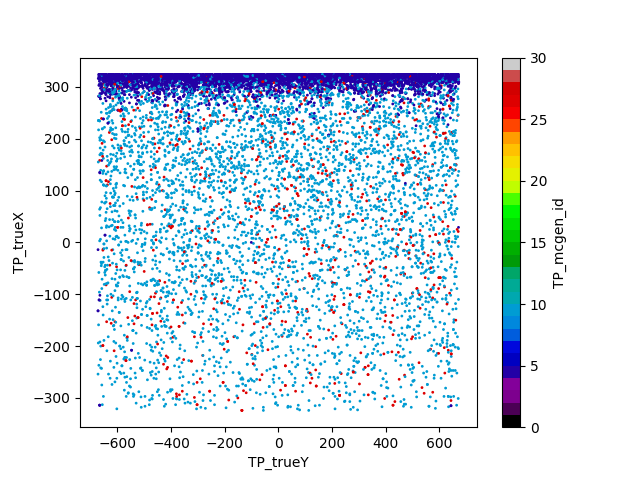

In [37]:
tps_c[(tps_c.TP_signal==1) & (tps_c.TP_mcgen_id.isin([4,9,26]))].plot.scatter(x='TP_trueY', y='TP_trueX',c='TP_mcgen_id', s=1, colormap=ni_py_spec_30, vmin=0, vmax=30)

<Axes: xlabel='TP_trueZ', ylabel='TP_trueY'>

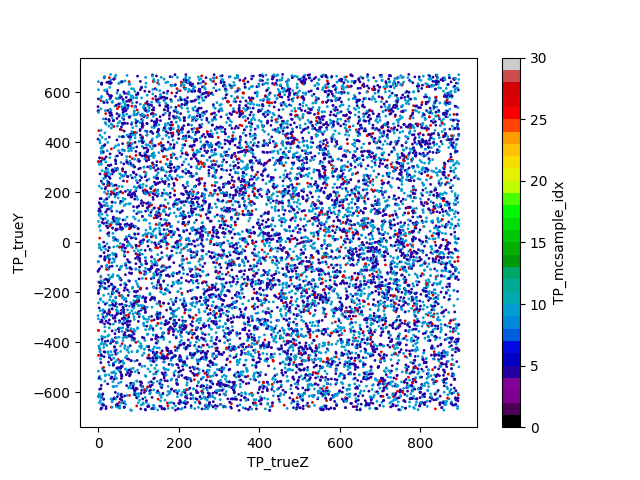

In [36]:
tps_c[(tps_c.TP_signal==1) & (tps_c.TP_mcsample_idx.isin([4,9,26]))].plot.scatter(x='TP_trueZ', y='TP_trueY',c='TP_mcsample_idx', s=1, colormap=ni_py_spec_30, vmin=0, vmax=30)

<Axes: xlabel='TP_trueZ', ylabel='TP_trueX'>

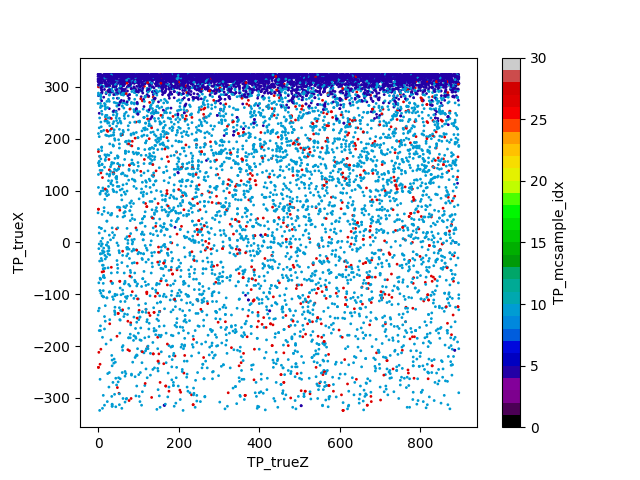

In [ ]:
tps_c[(tps_c.TP_signal==1) & (tps_c.TP_mcsample_idx.isin([4,9,26]))].plot.scatter(x='TP_trueZ', y='TP_trueX',c='TP_mcsample_idx', s=1, colormap=ni_py_spec_30, vmin=0, vmax=30)

<Axes: xlabel='TP_trueZ', ylabel='TP_trueX'>

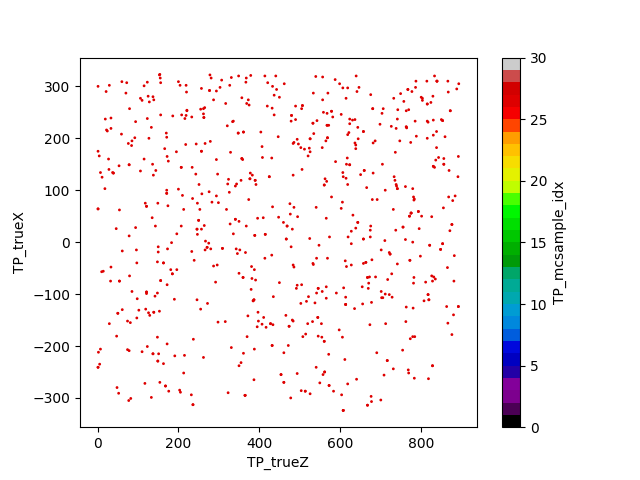

In [42]:
tps_c[(tps_c.TP_signal==1) & (tps_c.TP_mcsample_idx.isin([26]))].plot.scatter(x='TP_trueZ', y='TP_trueX',c='TP_mcsample_idx', s=1, colormap=ni_py_spec_30, vmin=0, vmax=30)

<Axes: xlabel='TP_channel', ylabel='TP_peakADC'>

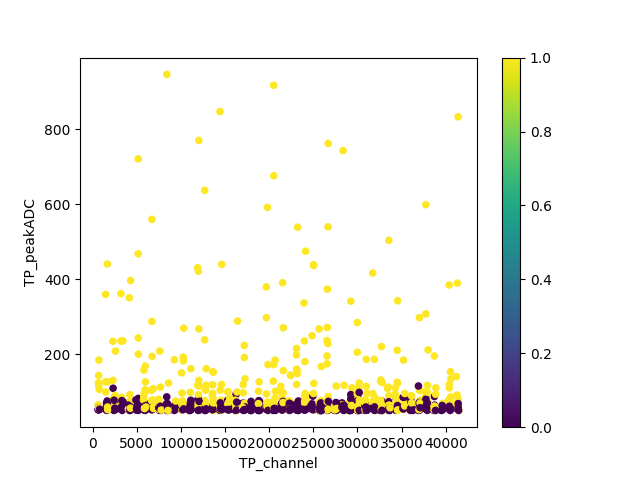

In [96]:
tps_c[(tps_c.TP_signal == 0)].plot.scatter(x="TP_channel", y="TP_peakADC", c=(tps_c[(tps_c.TP_signal == 0)].TP_peakT > 8000).to_numpy(int), cmap="viridis")

In [81]:
ides = pool.ides

Text(0.5, 0, 'time')

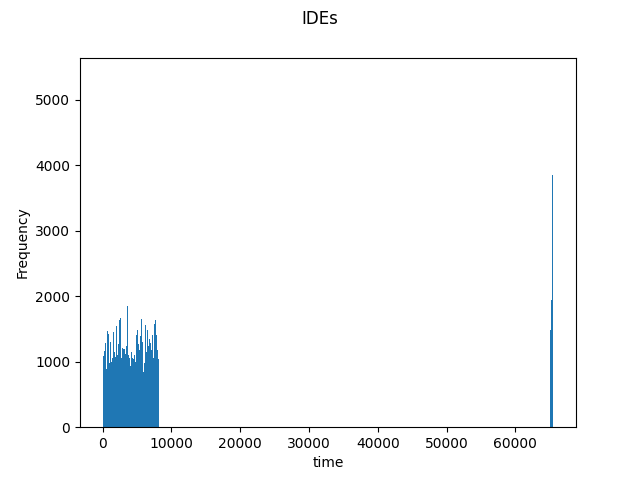

In [99]:
fig, ax = plt.subplots(1,1)
fig.suptitle("IDEs")

ides.time.plot.hist(bins=8192, ax=ax)
ax.set_xlabel("time")

<Axes: ylabel='Frequency'>

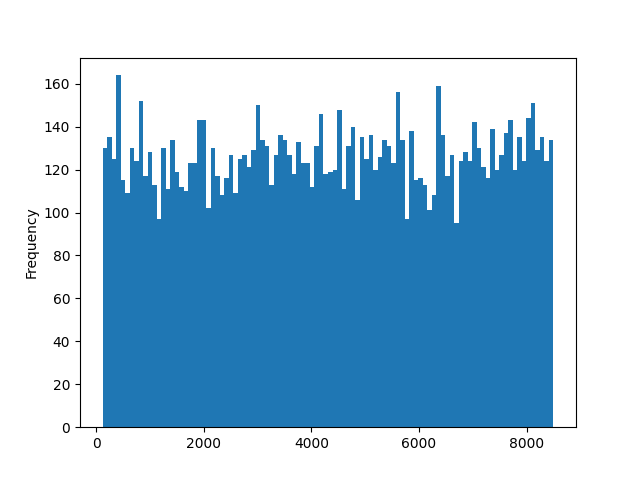

In [102]:
plt.subplots(1,1)

tps_c.TP_peakT.plot.hist(bins=100)


<Axes: xlabel='TP_peakT', ylabel='TP_SADC'>

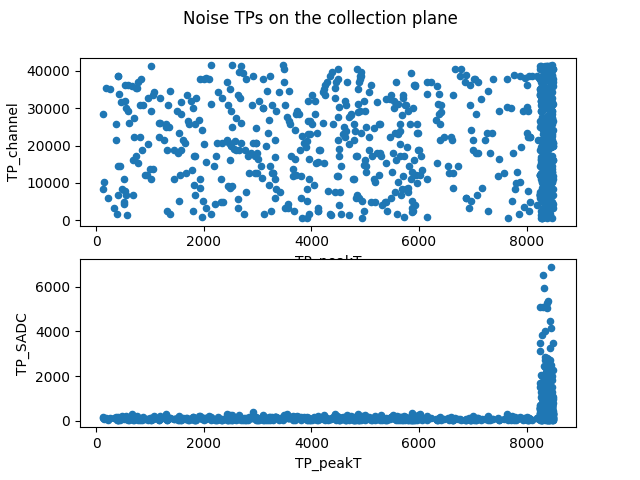

In [75]:
fig, ax = plt.subplots(2,1)
fig.suptitle("Noise TPs on the collection plane")

tps_c[(tps_c.TP_signal == 0)].plot.scatter(x='TP_peakT', y='TP_channel', ax=ax[0])
tps_c[(tps_c.TP_signal == 0)].plot.scatter(x='TP_peakT', y='TP_SADC', ax=ax[1])

<Axes: xlabel='TP_peakT', ylabel='TP_SADC'>

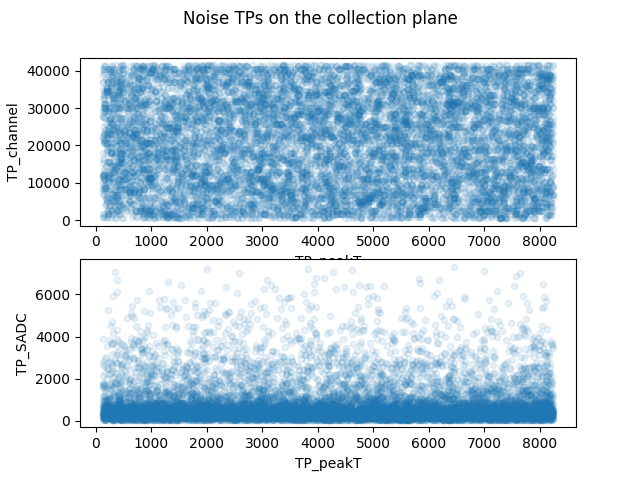

In [79]:
fig, ax = plt.subplots(2,1)
fig.suptitle("Noise TPs on the collection plane")

tps_c[(tps_c.TP_signal == 1)].plot.scatter(x='TP_peakT', y='TP_channel', ax=ax[0], alpha=0.1)
tps_c[(tps_c.TP_signal == 1)].plot.scatter(x='TP_peakT', y='TP_SADC', ax=ax[1], alpha=0.1)

<Axes: >

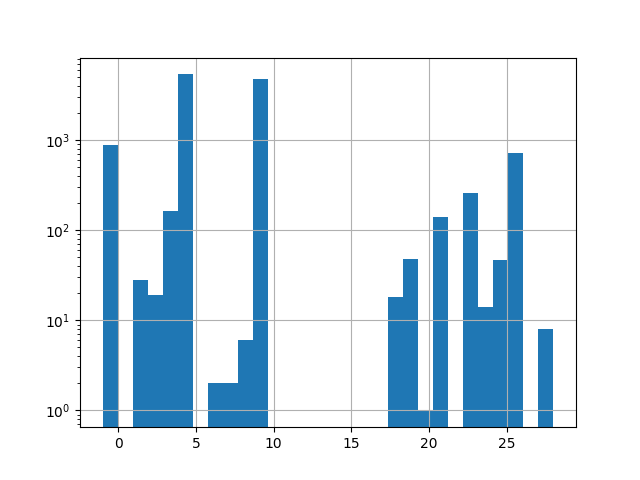

In [43]:
fig, ax = plt.subplots(1,1)

# tps_c.TP_mcgen_id.hist(bins=len(pool.info['mc_generators']), ax=ax, logy=True)
tps_c.TP_mcgen_id.hist(bins=len(pool.info['mc_generators'])+1, ax=ax, log=True)


(array([[4.910e+02, 2.800e+01, 1.700e+01, 1.610e+02, 5.381e+03, 0.000e+00,
         2.000e+00, 2.000e+00, 6.000e+00, 4.819e+03, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.800e+01, 4.800e+01, 1.000e+00, 1.420e+02, 0.000e+00, 2.570e+02,
         1.400e+01, 4.700e+01, 7.210e+02, 0.000e+00, 8.000e+00, 0.000e+00],
        [8.890e+02, 2.800e+01, 1.900e+01, 1.630e+02, 5.405e+03, 0.000e+00,
         2.000e+00, 2.000e+00, 6.000e+00, 4.842e+03, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.800e+01, 4.800e+01, 1.000e+00, 1.420e+02, 0.000e+00, 2.580e+02,
         1.400e+01, 4.700e+01, 7.250e+02, 0.000e+00, 8.000e+00, 0.000e+00]]),
 array([-1.        ,  0.03333333,  1.06666667,  2.1       ,  3.13333333,
         4.16666667,  5.2       ,  6.23333333,  7.26666667,  8.3       ,
         9.33333333, 10.36666667, 11.4       , 12.43333333, 13.46666667,
        14.5       , 15.533

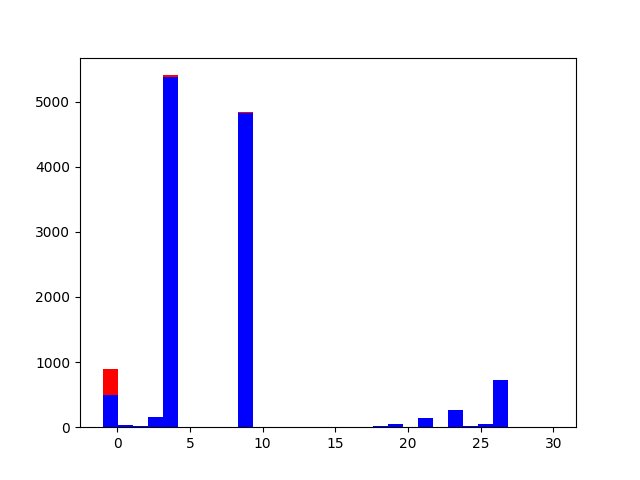

In [74]:
fig, ax = plt.subplots(1,1)

plt.hist([
    tps_c[tps_c.TP_peakT < 8200 ].TP_mcgen_id,
    tps_c[tps_c.TP_peakT > 8200 ].TP_mcgen_id,
    ],
    bins=len(pool.info['mc_generators'])+1, range=(-1,30), stacked=True, color = ['b','r'],
    )
# plt.yscale('log')



/var/folders/dw/sj94s2457kl2gkb829ty4_cc0000gn/T/ipykernel_83043/2440589285.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tps_c.groupby(['TP_late', pd.cut(tps_c['TP_mcgen_id'], np.arange(-1,len(pool.info['mc_generators'])))]).size().unstack(0)\
/var/folders/dw/sj94s2457kl2gkb829ty4_cc0000gn/T/ipykernel_83043/2440589285.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tps_c.groupby(['TP_late', pd.cut(tps_c['TP_mcgen_id'], np.arange(-1,len(pool.info['mc_generators'])))]).size().unstack(0)


TP_late,False,True
TP_mcgen_id,,
"(-1, 0]",0,0
"(0, 1]",28,0
"(1, 2]",17,2
"(2, 3]",161,2
"(3, 4]",5381,24
"(4, 5]",0,0
"(5, 6]",2,0
"(6, 7]",2,0
"(7, 8]",6,0


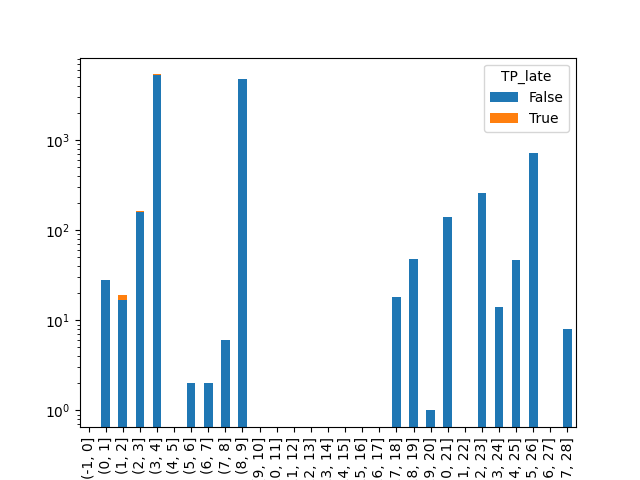

In [69]:
import pandas as pd
fig, ax = plt.subplots(1,1)

tps_c.groupby(['TP_late', pd.cut(tps_c['TP_mcgen_id'], np.arange(-1,len(pool.info['mc_generators'])))]).size().unstack(0)\
       .plot.bar(stacked=True, ax=ax)

plt.yscale('log')
tps_c.groupby(['TP_late', pd.cut(tps_c['TP_mcgen_id'], np.arange(-1,len(pool.info['mc_generators'])))]).size().unstack(0)

In [57]:
tps_c['TP_late'] = tps_c.TP_peakT > 8200

/var/folders/dw/sj94s2457kl2gkb829ty4_cc0000gn/T/ipykernel_83043/2551091063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tps_c['TP_late'] = tps_c.TP_peakT > 8200


In [47]:
tps_c

event  n_TPs  TP_channel  TP_startT  TP_peakT  TP_peakADC  \
entry subentry                                                              
0     61            1   8173         573        490       492         120   
      62            1   8173         573       5109      5113         177   
      63            1   8173         576       1995      1997          96   
      64            1   8173         578       6791      6794         164   
      65            1   8173         580       6535      6536          71   
...               ...    ...         ...        ...       ...         ...   
2     8147          3   8152       41452       7771      7774         208   
      8148          3   8152       41453       1942      1943          61   
      8149          3   8152       41453       3478      3478          51   
      8150          3   8152       41453       5809      5812          73   
      8151          3   8152       41471        480       480          54   

                TP_SADC  TP_TOT  TP_plane  TP_TPC  TP_trueX  TP_trueY  \
entry subentry                                                          
0     61            602       7         2       0       300      -615   
      62           1093       9         2       0       210      -618   
      63            415       5         2       0       303      -545   
      64            966       8         2       0       221      -606   
      65            253       4         2       0       -36      -536   
...                 ...     ...       ...     ...       ...       ...   
2     8147         1169       8         2      47       320       655   
      8148          174       3         2      47       314       612   
      8149           51       1         2      47        -1        -1   
      8150          263       4         2      47       150       656   
      8151           54       1         2      47      -205       671   

                TP_trueZ  TP_signal  TP_mcgen_id  TP_n_mcgen  TP_late  
entry subentry                                                         
0     61               1          1           26           1     True  
      62               1          1            9           1     True  
      63               2          1            9           1     True  
      64               3          1            9           1     True  
      65               4          1            9           1     True  
...                  ...        ...          ...         ...      ...  
2     8147           886          1            4           1     True  
      8148           886          1            9           1     True  
      8149            -1          0           -1          -1     True  
      8150           886          1            9           1     True  
      8151           895          1            9           1     True  

[12618 rows x 17 columns]

<Axes: >

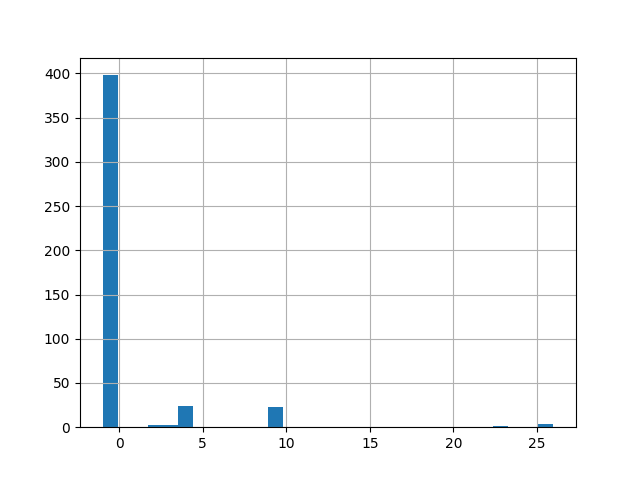

In [67]:
fig, ax = plt.subplots(1,1)

tps_c[tps_c.TP_late].TP_mcgen_id.hist(bins=len(pool.info['mc_generators'])+1)

In [102]:
pool.info['mc_generators'][26]

'Kr85GenInLAr'

(array([[4.050e+02, 3.290e+02, 2.910e+02, 2.880e+02, 3.700e+02, 2.910e+02,
         2.480e+02, 2.260e+02, 1.800e+02, 1.780e+02, 1.880e+02, 1.290e+02,
         1.040e+02, 1.050e+02, 1.210e+02, 1.080e+02, 9.100e+01, 9.800e+01,
         8.800e+01, 9.000e+01, 5.600e+01, 6.300e+01, 6.200e+01, 8.300e+01,
         5.500e+01, 4.900e+01, 4.200e+01, 4.900e+01, 4.300e+01, 3.900e+01,
         4.800e+01, 4.600e+01, 3.600e+01, 3.300e+01, 4.800e+01, 4.700e+01,
         4.300e+01, 3.000e+01, 3.700e+01, 2.500e+01, 2.500e+01, 2.500e+01,
         2.200e+01, 2.100e+01, 2.800e+01, 2.000e+01, 2.400e+01, 2.200e+01,
         1.900e+01, 1.600e+01, 1.300e+01, 1.400e+01, 2.100e+01, 2.000e+01,
         1.200e+01, 1.100e+01, 9.000e+00, 1.400e+01, 1.700e+01, 1.400e+01,
         9.000e+00, 1.000e+01, 1.200e+01, 8.000e+00, 2.000e+00, 6.000e+00,
         8.000e+00, 1.200e+01, 5.000e+00, 3.000e+00, 7.000e+00, 6.000e+00,
         5.000e+00, 2.000e+00, 1.000e+01, 8.000e+00, 2.000e+00, 5.000e+00,
         4.000e+00, 3.000

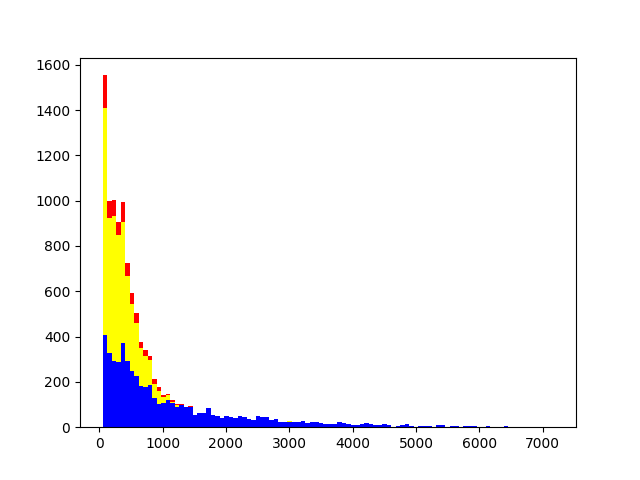

In [198]:
fig, ax = plt.subplots(1,1)
# tps_c[tps_c.TP_mcgen_id == 4].TP_SADC.hist(bins=100)
# tps_c[tps_c.TP_mcgen_id == 9].TP_SADC.hist(bins=100)
# tps_c[tps_c.TP_mcgen_id == 26].TP_SADC.hist(bins=100)

ax.hist([
    tps_c[tps_c.TP_mcgen_id == 4].TP_SADC, 
    tps_c[tps_c.TP_mcgen_id == 9].TP_SADC, 
    tps_c[tps_c.TP_mcgen_id == 26].TP_SADC, 
    ], 
    bins=100, 
    density=False,
    color=['blue', 'yellow', 'red'],
    label=['"Ar39"', '"Gamma"', '"Kr"'], 
    stacked=True,
    alpha=1)

In [118]:
pool.add_rawdigits("../data/vd/bkg/trigger_digits_waves_detsim_vd_radiols.root")

In [119]:
pool.events

,event
entry,
0,1
1,2
2,3


In [199]:
import uproot
f = uproot.open("../data/vd/bkg/100events/trigger_digits_waves_detsim_vd_radiols.root")

In [219]:
from rich import print
adc_hists = {}
for k in f.keys():
    obj_name = k.split('/')[-1]

    if obj_name.startswith('ADCsPlane') or obj_name.startswith('ADCsNoisePlane'):
        adc_hists[obj_name.split(';')[0]] = f[k.split(';')[0]]

print(adc_hists)

{
    'ADCsPlaneX': <TH1I (version 3) at 0x000410d9a0d0>,
    'ADCsPlaneU': <TH1I (version 3) at 0x00011896c2d0>,
    'ADCsPlaneV': <TH1I (version 3) at 0x000412c6b110>,
    'ADCsNoisePlaneX': <TH1I (version 3) at 0x000412c6b610>,
    'ADCsNoisePlaneU': <TH1I (version 3) at 0x000412c6b9d0>,
    'ADCsNoisePlaneV': <TH1I (version 3) at 0x000412c6bc50>
}

{0: (np.float64(1638.4225882352941), np.float64(8.899960705394788))}

{0: (np.float64(1638.4225882352941), np.float64(8.899960705394788))}

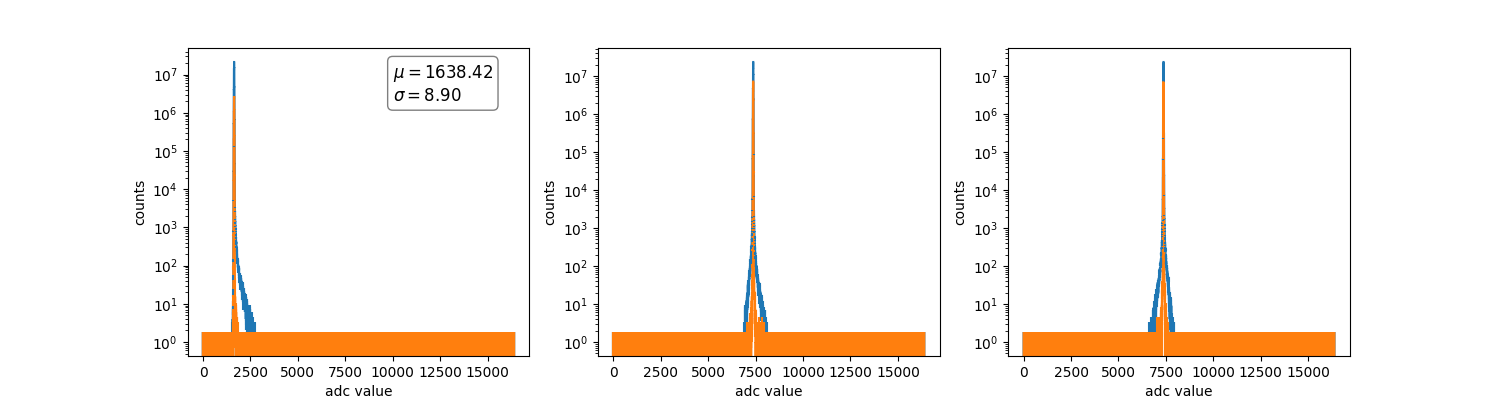

In [ ]:
from tpvalidator.histograms import uproot_hist_mean_std


# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='white', alpha=0.5)


fig,axes= plt.subplots(1,3, figsize=(15,4))
ax = axes[0]
adc_hists['ADCsPlaneX'].to_hist().plot(ax=ax)
adc_hists['ADCsNoisePlaneX'].to_hist().plot(ax=ax)
ax.set_xlabel('adc value')
ax.set_ylabel('counts')

mu, sigma = uproot_hist_mean_std(adc_hists['ADCsNoisePlaneX'])[0]

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\sigma=%.2f$' % (sigma, )))

# place a text box in top center in axes coords
ax.text(0.6, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='left', bbox=props)


ax = axes[1]
adc_hists['ADCsPlaneU'].to_hist().plot(ax=ax)
adc_hists['ADCsNoisePlaneU'].to_hist().plot(ax=ax)
ax.set_xlabel('adc value')
ax.set_ylabel('counts')

mu, sigma = uproot_hist_mean_std(adc_hists['ADCsNoisePlaneX'])[0]

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\sigma=%.2f$' % (sigma, )))

# place a text box in top center in axes coords
ax.text(0.6, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='left', bbox=props)


ax = axes[2]
adc_hists['ADCsPlaneV'].to_hist().plot(ax=ax)
adc_hists['ADCsNoisePlaneV'].to_hist().plot(ax=ax)
ax.set_xlabel('adc value')
ax.set_ylabel('counts')

mu, sigma = uproot_hist_mean_std(adc_hists['ADCsNoisePlaneX'])[0]

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\sigma=%.2f$' % (sigma, )))

# place a text box in top center in axes coords
ax.text(0.6, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='left', bbox=props)


for ax in axes:
    ax.set_yscale("log")

In [177]:
def uproot_hist_mean_std(h):
    """
    Compute statistical mean and std deviation for an uproot histogram object
    (TH1, TH2, ...). Returns a dict {axis_index: (mean, stddev)}.
    """
    arr = h.to_numpy()

    # 1D histogram
    if len(arr) == 2:
        values, edges = arr
        centers = 0.5 * (edges[1:] + edges[:-1])
        total = values.sum()
        if total == 0:
            raise ValueError("Histogram is empty")

        mean = np.average(centers, weights=values)
        var = np.average((centers - mean)**2, weights=values)
        return {0: (mean, np.sqrt(var))}

    # 2D histogram
    elif len(arr) == 3:
        values, xedges, yedges = arr
        total = values.sum()
        if total == 0:
            raise ValueError("Histogram is empty")

        xcenters = 0.5 * (xedges[1:] + xedges[:-1])
        ycenters = 0.5 * (yedges[1:] + yedges[:-1])

        X, Y = np.meshgrid(xcenters, ycenters, indexing="ij")

        mean_x = (values * X).sum() / total
        mean_y = (values * Y).sum() / total

        var_x = (values * (X - mean_x)**2).sum() / total
        var_y = (values * (Y - mean_y)**2).sum() / total

        return {
            0: (mean_x, np.sqrt(var_x)),
            1: (mean_y, np.sqrt(var_y)),
        }

    else:
        raise NotImplementedError("Only 1D and 2D histograms are supported for now")
    

print(uproot_hist_mean_std(h_adc))
print(uproot_hist_mean_std(h_noise_adc))


{0: (np.float64(1638.4246757655117), np.float64(9.268922747477161))}
{0: (np.float64(1638.422810905184), np.float64(8.902760073609233))}


In [203]:
from tpvalidator.histograms import uproot_hist_mean_std
